In [102]:
import os
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

pd.options.mode.chained_assignment = None 

## Step 1: Load your data, including testing/training split from Project 1
Loading ecommerce data from kaggle (https://www.kaggle.com/prachi13/customer-analytics)

Addressing any missing data issues.

In [103]:
folder = "https://raw.githubusercontent.com/beyenidogan/AdvData/main/Project2/"
file_name="ecommerce_shipping.csv"
file_url=folder+file_name

shipping = pd.read_csv(file_url,error_bad_lines=False)


In [104]:
shipping.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,ReachedonTime_YN
0,1,D,Flight,4,2,177,3,low,F,44,1233.0,1
1,2,F,Flight,4,5,216,2,low,M,59,3088.0,1
2,3,A,Flight,2,2,183,4,low,M,48,3374.0,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177.0,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484.0,1


In [105]:
shipping.shape

(10999, 12)

In [106]:
shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10999 non-null  object 
 2   Mode_of_Shipment     10999 non-null  object 
 3   Customer_care_calls  10999 non-null  int64  
 4   Customer_rating      10999 non-null  int64  
 5   Cost_of_the_Product  10999 non-null  int64  
 6   Prior_purchases      10999 non-null  int64  
 7   Product_importance   10999 non-null  object 
 8   Gender               10999 non-null  object 
 9   Discount_offered     10999 non-null  int64  
 10  Weight_in_gms        9898 non-null   float64
 11  ReachedonTime_YN     10999 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 1.0+ MB


In [107]:
shipping.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,ReachedonTime_YN
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,9898.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3636.579612,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1636.169391,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1842.000000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4150.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5051.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


## Step 2: Preparing the dataset
Making sure that all the appropriate variables are converted to categorical variables (as ordinal or one hot) and any necessary feature scaling is done

In [108]:
shipping['Product_importance_S'] = shipping['Product_importance'].replace(['low','medium','high'],[1,2,3])
shipping.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,ReachedonTime_YN,Product_importance_S
0,1,D,Flight,4,2,177,3,low,F,44,1233.0,1,1
1,2,F,Flight,4,5,216,2,low,M,59,3088.0,1,1
2,3,A,Flight,2,2,183,4,low,M,48,3374.0,1,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177.0,1,2
4,5,C,Flight,2,2,184,3,medium,F,46,2484.0,1,2


In [109]:
shipping = shipping.drop('Product_importance', axis=1)
shipping.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,ReachedonTime_YN,Product_importance_S
0,1,D,Flight,4,2,177,3,F,44,1233.0,1,1
1,2,F,Flight,4,5,216,2,M,59,3088.0,1,1
2,3,A,Flight,2,2,183,4,M,48,3374.0,1,1
3,4,B,Flight,3,3,176,4,M,10,1177.0,1,2
4,5,C,Flight,2,2,184,3,F,46,2484.0,1,2


In [110]:
shipping.shape

(10999, 12)

In [111]:
y = shipping["ReachedonTime_YN"]
y.value_counts()

1    6563
0    4436
Name: ReachedonTime_YN, dtype: int64

In [112]:
X = shipping.drop("ReachedonTime_YN", axis=1)
X.shape

(10999, 11)

In [113]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=0)

In [114]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder


numeric_features = ['Customer_care_calls','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','Customer_rating','Product_importance_S']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Warehouse_block','Mode_of_Shipment', 'Gender']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
     
X_train_encoded_resuts = preprocessor.fit_transform(X_train)

print(X_train_encoded_resuts)

X_train_encoded = pd.DataFrame(X_train_encoded_resuts)
# Viewing few rows of data
X_train_encoded.sample(10)


[[-0.05198298 -0.37514254 -0.37098581 ...  0.          1.
   0.        ]
 [-0.05198298  1.28591748 -1.02633698 ...  1.          1.
   0.        ]
 [-0.92990676 -1.66246406  0.93971653 ...  0.          1.
   0.        ]
 ...
 [ 0.82594079 -0.79040755  0.28436536 ...  0.          1.
   0.        ]
 [ 0.82594079  0.45538747  0.93971653 ...  1.          0.
   1.        ]
 [ 0.82594079  0.97446873  0.93971653 ...  1.          0.
   1.        ]]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
3734,0.825941,1.223628,0.939717,-0.204968,-1.648445,-0.696800,0.616999,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4649,0.825941,-0.873461,-0.370986,0.788123,-1.384019,-0.696800,-0.943948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5517,0.825941,-0.852697,0.284365,-0.577377,1.277530,0.010041,-0.943948,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3351,-0.051983,0.143939,-0.370986,0.788123,-0.520312,0.716883,2.177947,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8738,-0.051983,0.870652,-0.370986,-0.204968,1.353720,0.010041,0.616999,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5462,-0.051983,0.372334,0.939717,-0.763582,-1.216272,0.716883,-0.943948,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7938,-0.929907,-0.333616,-0.370986,-0.204968,-0.903186,1.423724,0.616999,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
5732,0.825941,0.476151,0.284365,-0.267036,1.185333,-0.696800,0.616999,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2926,-0.051983,0.226992,-0.370986,-0.453241,1.413264,1.423724,-0.943948,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6138,-0.051983,-0.271326,-0.370986,-0.391173,0.903619,0.716883,-0.943948,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [125]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


numeric_features = ['Customer_care_calls','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','Customer_rating','Product_importance_S']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Warehouse_block','Mode_of_Shipment', 'Gender']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', KNeighborsClassifier(n_neighbors=5))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

clf.fit(X_train, y_train)
print("train score: %.3f" % clf.score(X_train, y_train))

print("test score: %.3f" % clf.score(X_test, y_test))


train score: 0.778
test score: 0.642


## Step 3: Examining the target attribute. 

Examining the attribute you are going to predict.

Plotting the distribution of the target attribute in the dataset (e.g., is it Gaussian, uniform, logarithmic). This will help in interpreting the performance of different algorithms on your data.

In [118]:
y.value_counts()

1    6563
0    4436
Name: ReachedonTime_YN, dtype: int64

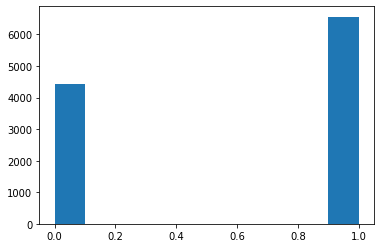

In [121]:
import matplotlib.pyplot as plt
plt.hist(y.values.reshape(-1, 1))
plt.show()